# Check bboxes of YOLO

Script to check the bboxes of the breast CBIS-DDSM dataset

In [1]:
%matplotlib inline

In [2]:
import os

import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from PIL import Image

In [3]:
def draw_box(
    image,
    x,
    y,
    width,
    height,
    color = None,
    lw=4,
):
    
    """Draw bounding box on an image

    Arguments:
        image {np.ndarray}: Numpy array of the image
        x {int}: X coordinate of the bounding-box (from csv)
        y {int}: Y coordinate of the bounding-box (from csv)
        width {int}: Width of the bounding-box (from csv)
        hight {int}: Hight of the bounding-box (from csv)
        color {}: Color of the bounding-box (default: {None})
        lw {int}: Line width (default: {4})

    Returns:
        image {np.ndarray}: Numpy array of the image with the bounding-box
    """

    x = min(max(x, 0), image.shape[1] - 1)
    y = min(max(y, 0), image.shape[0] - 1)
    if color is None:
        color = np.max(image)
    if len(image.shape) > 2 and not hasattr(color, "__len__"):
        color = (color,) + (0,) * (image.shape[-1] - 1)
    image[y : y + lw, x : x + width] = color
    image[y + height - lw : y + height, x : x + width] = color
    image[y : y + height, x : x + lw] = color
    image[y : y + height, x + width - lw : x + width] = color
    return image

In [9]:
img_path = '/media/si-lab/63bc1baf-d08c-4db5-b271-e462f3f4444d/a_e_g/datasets/breast_CBIS-DDSM/yolo_dataset/clahe/train/images/Mass-Training_P_01600_RIGHT_MLO.png'
path_to_img = os.path.dirname(img_path)
img_name = os.path.basename(img_path)
img_name_wo_ext = img_name.split('.')[0]
path_to_label = os.path.join(os.path.dirname(path_to_img), 'labels')
label_path = os.path.join(path_to_label, f'{img_name_wo_ext}.txt')

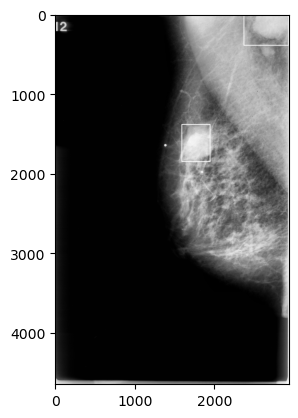

In [10]:
img_pil = Image.open(img_path)
img_npy = np.array(img_pil)

img_width = img_npy.shape[1]
img_height = img_npy.shape[0]

with open(label_path, 'r') as label_file:
    lines = [line.rstrip() for line in label_file]

for line in lines:
        _, x_center, y_center, width, height = line.split(' ')
        x_center = float(x_center)
        y_center = float(y_center)
        width = float(width)
        height = float(height)

        x_min = int(x_center * img_width - (width * img_width) // 2)
        y_min = int(y_center * img_height - (height * img_height) // 2)

        width *= img_width
        height *= img_height

        width = int(round(width))
        height = int(round(height))

        img_npy = draw_box(img_npy, x=x_min, y=y_min, width=width, height=height, lw=10)
    

plt.imshow(img_npy, cmap='gray')